# Understanding Apple Quality: A Prediction Based on Ripeness and Acidity
### by Paul Bunuan, Nathan Ng, Tyler Tan, Junyi Yao

# Introduction
    Apples are a common fruit consumed by people every day, with a variety of species being cultivated and harvested from farms across the world. In 2014, roughly 84 million tonnes of apples were produced (Musacchi & Serra, 2018). It is important for producers and sellers to maintain a quality standard for apples with regards to characteristics such as acidity, colour, shape, weight, and more. The values of these qualities will influence sales and the consumer’s chances of purchasing the product again. There are different ways manufacturers can measure the traits of apples. For instance, as apples ripen, they tend to become more alkaline with decreasing malic acid content, the primary acid found in apples. (Farcuh, 2018). However, the acidity is not used to track apple maturity because of the variation amongst species and differing optimal acid content for consumption (Farcuh, 2018). In our project, we aim to determine how the acidity and ripeness values of any given apple influences its overall quality status as “good” or “bad”; to answer this predictive question, we use a public dataset from Kaggle regarding apple quality (Elgiriyewithana, 2024). 

    	This dataset contains nine columns, which include Apple ID, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, and Quality. However, for the purposes of this report, only the Ripeness, Acidity, and Quality columns will be used. It is hypothesized that apples with a higher Ripeness value and lower Acidity value are more likely to be characterized as “good” quality apples.


# Methods & Results
## Methods
1. describe in written English the methods you used to perform your analysis from beginning to end that narrate the code that does the analysis.
2. your report should include code which:-             
performs a summary of the data set that is relevant for exploratory data analysis related to the plannanalysis 
            is
perf the analysis lysisly            sis
creates a visualization of the aa- ly            sis 
note: ale/l tablfigures figure should have a figure/tabler legend


### Analysis
First we loaded in the libraries that are needed for the data

In [1]:
# Libraries used
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Then we created a dataframe for the data called `apple`.

In [37]:

apple <- read_csv("data/apple_quality.csv",show_col_types = FALSE) |>
    head(-1) #This function removes the last row of the dataframe which included NA values and text crediting the author. |>
apple
print("Table 1: Apple dataset")

A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,-3.9700485,-2.512336,5.346330,-1.0120087,1.8449004,0.32983980,-0.491590483,good
1,-1.1952172,-2.839257,3.664059,1.5882323,0.8532858,0.86753008,-0.722809367,good
2,-0.2920239,-1.351282,-1.738429,-0.3426159,2.8386355,-0.03803333,2.621636473,bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3997,-2.6345153,-2.138247,-2.4404613,0.6572229,2.199709,4.7638592,-1.334611391,bad
3998,-4.0080037,-1.779337,2.3663970,-0.2003294,2.161435,0.2144884,-2.229719806,good
3999,0.2785397,-1.715505,0.1212173,-1.1540748,1.266677,-0.7765715,1.599796456,good


[1] "Table 1: Apple dataset"


### Cleaning up the Data 

As noted, we have read the CSV file where the data is stored. However, the data is cluttered with numerous columns that are irrelevant to our classification model. To ensure precision, we meticulously clean up the data, selecting only the specific columns that are crucial for our model's accuracy.

BONUS: We noticed that R had trouble reading the original `Acidity` column. This was most likely because there were hidden characters in the file that R could not read, so we cleaned up the data below with the following code.

In [38]:

apple_manipulated <- apple |>
    clean_names() |>
    mutate(acidity = as.numeric(acidity))
apple_manipulated
print("Table 2: Apple dataset (tidy)")

a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,-3.9700485,-2.512336,5.346330,-1.0120087,1.8449004,0.32983980,-0.4915905,good
1,-1.1952172,-2.839257,3.664059,1.5882323,0.8532858,0.86753008,-0.7228094,good
2,-0.2920239,-1.351282,-1.738429,-0.3426159,2.8386355,-0.03803333,2.6216365,bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3997,-2.6345153,-2.138247,-2.4404613,0.6572229,2.199709,4.7638592,-1.334611,bad
3998,-4.0080037,-1.779337,2.3663970,-0.2003294,2.161435,0.2144884,-2.229720,good
3999,0.2785397,-1.715505,0.1212173,-1.1540748,1.266677,-0.7765715,1.599796,good


[1] "Table 2: Apple dataset (tidy)"


In [39]:
set.seed(4321)
#We selected the values we would use for our data analysis, which only included Ripeness, Acidity, and Quality.
#A random sample of 100 was taken because the data set was so large.
apple_select <- apple_manipulated |>
    select(ripeness, acidity, quality)
apple_select
print("Table 3: Apple select dataset")

ripeness,acidity,quality
<dbl>,<dbl>,<chr>
0.32983980,-0.4915905,good
0.86753008,-0.7228094,good
-0.03803333,2.6216365,bad
⋮,⋮,⋮
4.7638592,-1.334611,bad
0.2144884,-2.229720,good
-0.7765715,1.599796,good


[1] "Table 3: Apple select dataset"


### Unknown K Value 
When solving classification problems, it is always good to have a defined K value for th model to use. In this case, we do not have the ideal K value yet which is why we created a model to determine candidates for a K value that would yield the best possible predictions within a certain sequence.

In [40]:
set.seed(4321)

apple_split <- initial_split(apple_select, prop = 0.75, strata = quality)
apple_train <- training(apple_split)
apple_test <- testing(apple_split)

apple_recipe <- recipe(quality ~ ripeness + acidity, data = apple_train) |>
 step_scale(all_predictors())|>
 step_center(all_predictors())

apple_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
         set_engine("kknn") |>
         set_mode("classification")

apple_workflow <- workflow() |>
    add_recipe(apple_recipe) |>
    add_model(apple_spec) 

apple_vfold<- vfold_cv(apple_train, v=5, strata=quality)

gridvals <- tibble(neighbors=seq(1,20))
print("Table 3: Apple results")
apple_results <- apple_workflow |>
 tune_grid(resamples = apple_vfold, grid = gridvals) |>
 collect_metrics() 

apple_results

[1] "Table 3: Apple results"


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5409962,5,0.005382947,Preprocessor1_Model01
1,roc_auc,binary,0.5409792,5,0.005362711,Preprocessor1_Model01
2,accuracy,binary,0.5409962,5,0.005382947,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,roc_auc,binary,0.6471332,5,0.01349593,Preprocessor1_Model19
20,accuracy,binary,0.5999963,5,0.01321200,Preprocessor1_Model20
20,roc_auc,binary,0.6494338,5,0.01239439,Preprocessor1_Model20


### Determining the Right K Value 
Based on the visualization of potential K values, we determined that the ideal value for K would range from 11 to 12 (based on a sequence from 1 to 20). This is because it has one of the highest accuracies amongst all the potential values of K, which plays well into the cross-validation because we use cross-validation to determine how a model would perform on a completely different set of data. By doing this, we can determine how the model generalizes predictions and choosing a K with a high accuracy is important, especially in the area of generalization where being close to the actual observation is ideal under all possible circumstances and data combinations.

In this case, we will settle with a K value of 11. 

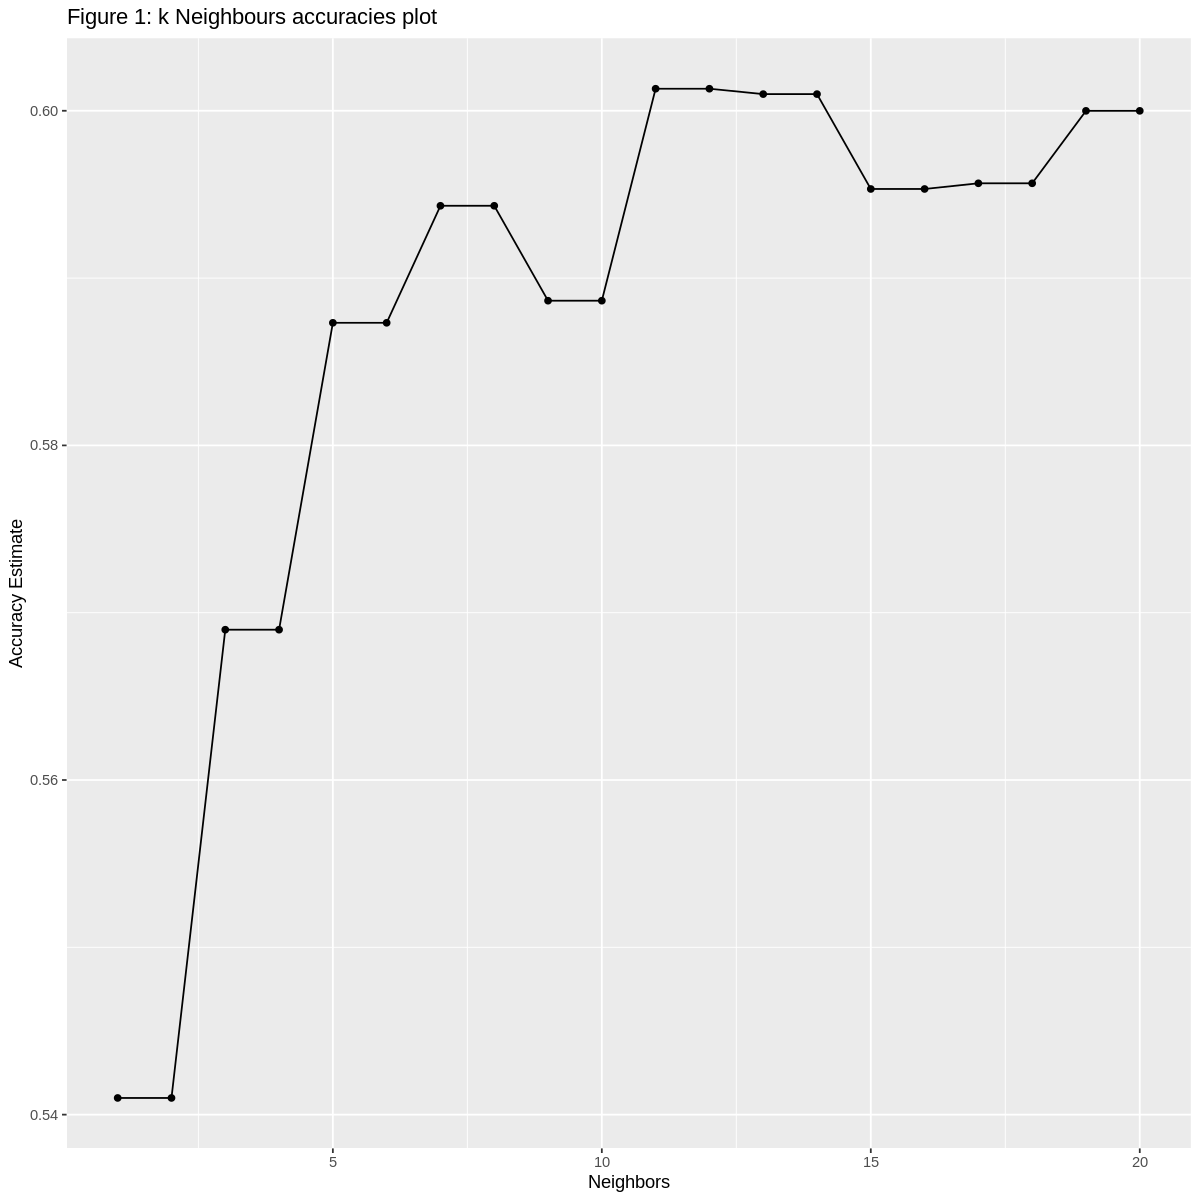

In [43]:
accuracies<-apple_results |>
 filter(.metric == "accuracy")

options(repr.plot.height = 10, repr.plot.width = 10)

accuracies_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
 geom_point() +
 geom_line() +
 labs(x = "Neighbors", y = "Accuracy Estimate",
     title = "Figure 1: k Neighbours accuracies plot")

accuracies_k

## Results

### Creating the Final Model
With the K value chosen, we can now create the final model that will be making the actual predictions on quality based on the variables that we have chosen.

In [44]:
# We now create the new model with this selected K Value

set.seed(4321)

apple_vfold<- vfold_cv(apple_train, v=5, strata=quality)

apple_recipe_final <- recipe(quality ~ ripeness + acidity, data = apple_train) |>
 step_scale(all_predictors())|>
 step_center(all_predictors())

apple_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
         set_engine("kknn") |>
         set_mode("classification")

apple_fit <- workflow() |>
    add_recipe(apple_recipe_final) |>
    add_model(apple_spec_final) |>
    fit(data = apple_select)

apple_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.392
Best kernel: rectangular
Best k: 11

### Using the Model to Predict Quality

Now that we have created our finalized classification model, with a defind K value, we will now use that model to make sample predictions on the quality of an apple, given any value for both acidity and ripeness.

In [45]:
apple_prediction_1 <- tibble(ripeness = 1.11, acidity = 1.11)
apple_prediction_2 <- tibble(ripeness = 0.51, acidity = 0.61)
apple_prediction_3 <- tibble(ripeness = 1.01, acidity = 0.91)
apple_prediction_4 <- tibble(ripeness = -0.123, acidity = -0.123)
apple_prediction_5 <- tibble(ripeness = 2.5, acidity = -1.5)

# For this example, we will use the apple_prediction_1 (You can create your own random observations or pull some to demonstrate)
print("Table 4: Apple Prediction 1")
apple_predicted <- predict(apple_fit, apple_prediction_1)
apple_predicted

[1] "Table 4: Apple Prediction 1"


.pred_class
<fct>
good


In [46]:
# Sample Prediction 2
print("Table 5: Apple Prediction 2")
apple_predicted_2 <- predict(apple_fit, apple_prediction_2)
apple_predicted_2

[1] "Table 5: Apple Prediction 2"


.pred_class
<fct>
bad


In [47]:
# Sample Prediction (From the first observation of apple_select)
print("Table 6: Apple Prediction first observation")
apple_prediction_ds_0 <- tibble(ripeness = 0.32983980, acidity = -0.4915905)

apple_predicted_ds_0 <- predict(apple_fit, apple_prediction_ds_0)
apple_predicted_ds_0

# Bonus: From what we can see, the predictions match! You can continue and try different values. These 3 were for a demonstration that our model works!

[1] "Table 6: Apple Prediction first observation"


.pred_class
<fct>
good


### Data Visualization
The following is a scatter plot of the testing set values.

Figure 1: plot of acidity vs ripeness determining quality of apples.

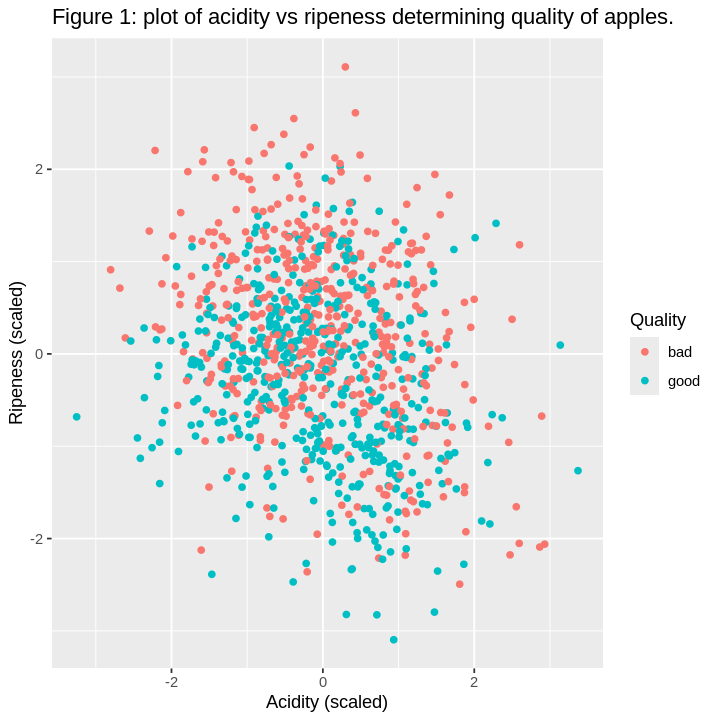

In [14]:
apple_scaled <- apple_recipe_final |>
    prep() |>
    bake(apple_test)

options(repr.plot.height = 6, repr.plot.width = 6)

apples_plot <- apple_scaled |>
    ggplot(aes(x = acidity, y = ripeness, colour = quality)) +
    geom_point() +
    labs(x = "Acidity (scaled)", y = "Ripeness (scaled)", colour = "Quality") +
    ggtitle("Figure 1: plot of acidity vs ripeness determining quality of apples.")
apples_plot 

# Discussion
Through the classification model, we successfully predicted whether the quality of apples is good or bad from two aspects: acidity and ripeness. If we were to take this visualization at face value, it is very difficult or impossible to properly imply a correlation between the two variables and their associated quality. 

This is most likely because, despite all the variables we have in the dataset, we still do not have enough information on apples to determine the standard/threshold to which an apple is good or bad quality.?
Take for example, apply type. There are hundreds of different apple species (types) which this dataset doesn’t mention. It could be possible that this dataset only has one apple type, but it is also possible that it could be a pool of many, we just don’t know. 

This is important because different apple types have different characteristics and therefore standards that make a certain apple of a certain kind better or worse. Since we don’t have this information, it can be very difficult to derive a meaningful correlation. 

But if we enter the values of apple ripeness and acidity，we can still predict the quality via our model built.


## Expected Findings
When data visualization was completed for the data, there was no apparent relationship between acidity and ripeness when it came to predicting the quality of apples. The values for both variables centered around zero because they were standardized. However, the data contained values for a variety of apples and it was not specific to a particular type. This caused a variance in the acidity and ripeness values that saturated the data making it difficult to have an effective prediction. This made it difficult to create an effective model, despite having correct code. Overall, we expected to find an association between acidity and ripeness of apples, but the variation in the data set leads to inconclusive results.

## Impact of Our Project
Considering that our project mainly focuses on data classification, our goal was to be able to create a model that would predict quality based on the values of specific predictors (acidity and ripeness). 

By being able to predict when a apple is good or bad quality, this can provide crucial insight into how each variable that we use can affect apple quality. Furthermore, such predictions may also be able to estimate the "ideal" ripeness and acidity values to yield the "good" quality apples. This can be useful especially in the real world where millions of apples are harvested and sold everyday. This makes it easier for the market to predict which apples would be good without having to individually test and evaluate saving and money. 

Futhermore, being able to understand the characteristics "bad" apples helps those supplying apples as they could adapt their practices to ensure that only good quality apples come out futher reducing waste and loss revenue.

Overall, being able to predict an apple quality is net positive for everybody. It saves time, money, increases efficiency and reduces health risk. While our model only uses 2 variables, we believe that it is a good first step and a proof of concept that something like this can be explored and expanded upon in a much larger scale to everyone's benefit.

## Future Questions
- With the high variation of values across different variables, would it be better if there were more than two quality classifications (e.g., giving quality ranking a numerical system like 1-5 instead of just “good” or “bad”)?
- Could this model be extended to other fruits and vegetables, broadening its potential impact and applications beyond just apples?
- Are there any other values for K that we did not cover that could create a model as accurate or if not, more accurate than our current model?
- Since our dataset doesn’t explicitly mention the species of apples used, how might changes in apple species affect our predictions? Since species have unique characteristics, would this skew the standard to which any given observation is “good” or “bad”?
- What other relationships could we explore if we approached this dataset with a different model such as KNN and or linear regression?

# Sources 
Elgiriyewithana, N. (2024, January 11). Apple Quality. <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp
;Kaggle.  https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data 
    
Farcuh, M. (2023). Fruit Harvest - Determining Apple Fruit Maturity and Optimal Harvest Date. <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp
;Determining Apple Fruit Maturity and Optimal Harvest Date. 

Musacchi, S., & Serra, S. (2018). Apple Fruit Quality: Overview on pre-harvest factors. Scientia Horticulturae, <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp
;234, 409–430. https://doi.org/10.1016/j.scienta.2017.12.057 